In [ ]:
# Menghubungkan Google Colab ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Mengatur agar plot ditampilkan inline
%matplotlib inline

Mounted at /content/drive


Dataset berhasil dimuat.
Contoh data:
   Unnamed: 0                                               text  label
0           1  ive enjoyed being able to slouch about relax a...      0
1           3                         i dont know i feel so lost      0
2           5         i was beginning to feel quite disheartened      0
3           9  i can still lose the weight without feeling de...      0
4          11  im feeling a little like a damaged tree and th...      0

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89832 entries, 0 to 89831
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    89832 non-null  object
 1   label   89832 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB

Jumlah nilai yang hilang per kolom:
text     0
label    0
dtype: int64


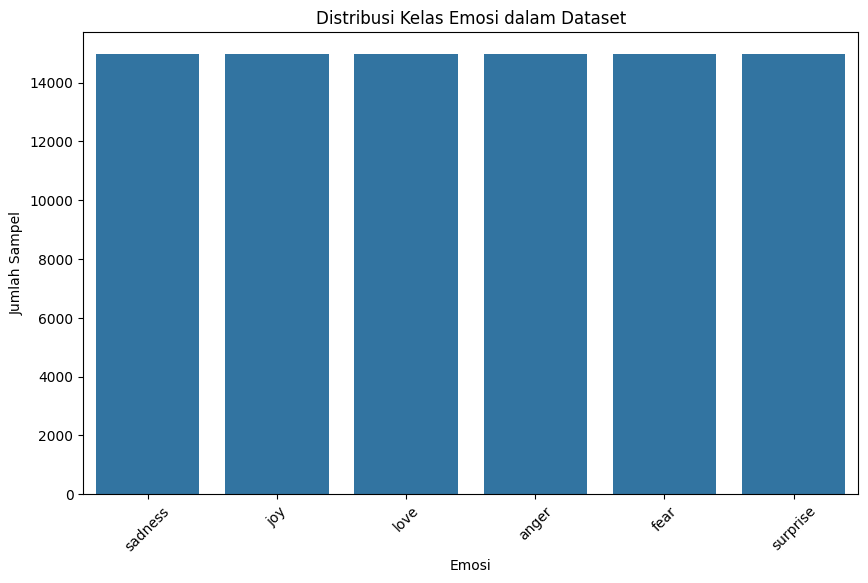

In [ ]:
# Ganti dengan path file Anda di Google Drive
file_path = '/content/drive/MyDrive/Studi_Independen/Modul 5 Tugas 2/modul5_tugas2 (1).csv'

# Memuat dataset
df = pd.read_csv(file_path)
print("Dataset berhasil dimuat.")

# Menampilkan 5 baris pertama
print("Contoh data:")
print(df.head())

# Menghapus kolom yang tidak diperlukan jika ada (misalnya 'Unnamed: 0')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Informasi dasar dataset
print("\nInformasi Dataset:")
df.info()

# Cek nilai yang hilang (missing values)
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Jika ada nilai yang hilang di kolom 'text' atau 'label', kita hapus baris tersebut
df.dropna(subset=['text', 'label'], inplace=True)
df['label'] = df['label'].astype(int)

# Membuat pemetaan label ke nama emosi untuk visualisasi
emotion_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['emotion_name'] = df['label'].map(emotion_map)

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion_name', data=df, order=df['emotion_name'].value_counts().index)
plt.title('Distribusi Kelas Emosi dalam Dataset')
plt.xlabel('Emosi')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Memisahkan fitur (teks) dan target (label)
texts = df['text'].values
labels = df['label'].values

# Konfigurasi untuk Tokenizer dan Padding
vocab_size = 10000  # Ukuran kosakata (jumlah kata unik yang akan dipertimbangkan)
max_length = 120    # Panjang maksimum setiap sequence
embedding_dim = 128 # Dimensi vektor untuk setiap kata
oov_tok = "<OOV>"   # Token untuk kata yang tidak ada di dalam kosakata

# 1. Tokenisasi
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)

# 2. Padding
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# 3. One-Hot Encoding pada Label
num_classes = len(df['label'].unique())
labels_categorical = to_categorical(labels, num_classes=num_classes)

# 4. Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_categorical, test_size=0.2, random_state=42, stratify=labels)

print(f"Ukuran set pelatihan: {X_train.shape}")
print(f"Ukuran set pengujian: {X_test.shape}")

Ukuran set pelatihan: (71865, 120)
Ukuran set pengujian: (17967, 120)


In [ ]:
# Model 1: Arsitektur LSTM Sederhana
model_1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_1.summary()

# Melatih Model 1
print("\n--- Melatih Model 1: LSTM Sederhana ---")
num_epochs = 15
batch_size = 64

history_1 = model_1.fit(X_train, y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        validation_split=0.1, # Menggunakan 10% data train untuk validasi
                        verbose=2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Melatih Model 1: LSTM Sederhana ---
Epoch 1/15
1011/1011 - 147s - 145ms/step - accuracy: 0.1630 - loss: 1.7924 - val_accuracy: 0.1592 - val_loss: 1.7919
Epoch 2/15
1011/1011 - 208s - 206ms/step - accuracy: 0.1662 - loss: 1.7920 - val_accuracy: 0.1592 - val_loss: 1.7930
Epoch 3/15
1011/1011 - 145s - 143ms/step - accuracy: 0.1666 - loss: 1.7920 - val_accuracy: 0.1592 - val_loss: 1.7920
Epoch 4/15
1011/1011 - 209s - 207ms/step - accuracy: 0.1656 - loss: 1.7920 - val_accuracy: 0.1592 - val_loss: 1.7921
Epoch 5/15
1011/1011 - 147s - 145ms/step - accuracy: 0.1655 - loss: 1.7920 - val_accuracy: 0.1592 - val_loss: 1.7920
Epoch 6/15
1011/1011 - 207s - 204ms/step - accuracy: 0.1666 - loss: 1.7919 - val_accuracy: 0.1592 - val_loss: 1.7920
Epoch 7/15
1011/1011 - 145s - 143ms/step - accuracy: 0.1670 - loss: 1.7919 - val_accuracy: 0.1613 - val_loss: 1.7921
Epoch 8/15
1011/1011 - 205s - 203ms/step - accuracy: 0.1665 - loss: 1.7919 - val_accuracy: 0.1613 - val_loss: 1.7920
Epoch 9/15
1011/1011 - 

In [ ]:
# Model 2: Arsitektur LSTM yang lebih kompleks
model_2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)), # return_sequences=True untuk menumpuk LSTM
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_2.summary()

# Melatih Model 2
print("\n--- Melatih Model 2: Stacked Bidirectional LSTM dengan Dropout ---")
history_2 = model_2.fit(X_train, y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        validation_split=0.1,
                        verbose=2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Melatih Model 2: Stacked Bidirectional LSTM dengan Dropout ---
Epoch 1/15
1011/1011 - 416s - 412ms/step - accuracy: 0.7319 - loss: 0.7049 - val_accuracy: 0.9318 - val_loss: 0.2231
Epoch 2/15
1011/1011 - 441s - 436ms/step - accuracy: 0.9352 - loss: 0.2133 - val_accuracy: 0.9371 - val_loss: 0.1912
Epoch 3/15
1011/1011 - 406s - 402ms/step - accuracy: 0.9477 - loss: 0.1525 - val_accuracy: 0.9516 - val_loss: 0.1286
Epoch 4/15
1011/1011 - 410s - 405ms/step - accuracy: 0.9522 - loss: 0.1268 - val_accuracy: 0.9509 - val_loss: 0.1297
Epoch 5/15
1011/1011 - 407s - 402ms/step - accuracy: 0.9537 - loss: 0.1172 - val_accuracy: 0.9452 - val_loss: 0.1568
Epoch 6/15
1011/1011 - 441s - 436ms/step - accuracy: 0.9561 - loss: 0.1113 - val_accuracy: 0.9517 - val_loss: 0.1454
Epoch 7/15
1011/1011 - 408s - 403ms/step - accuracy: 0.9573 - loss: 0.1018 - val_accuracy: 0.9471 - val_loss: 0.1622
Epoch 8/15
1011/1011 - 410s - 405ms/step - accuracy: 0.9581 - loss: 0.0999 - val_accuracy: 0.9499 - val_loss: 0.1

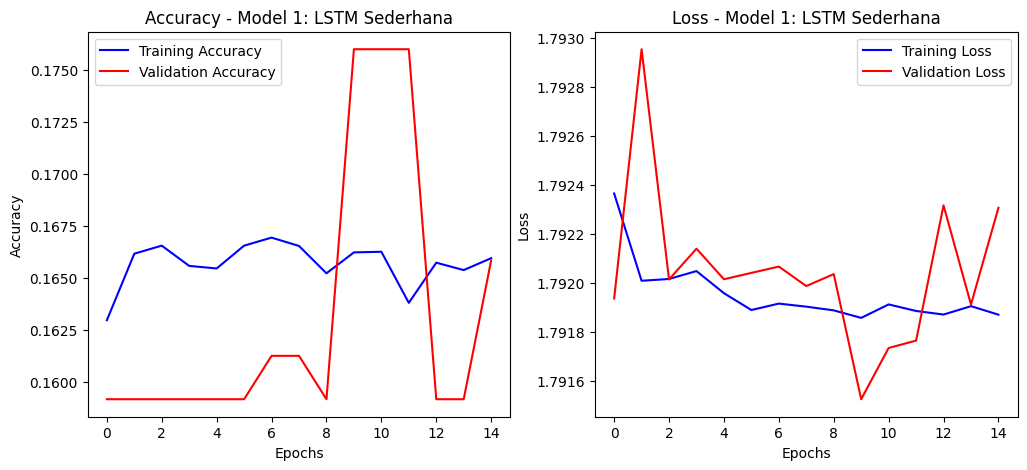

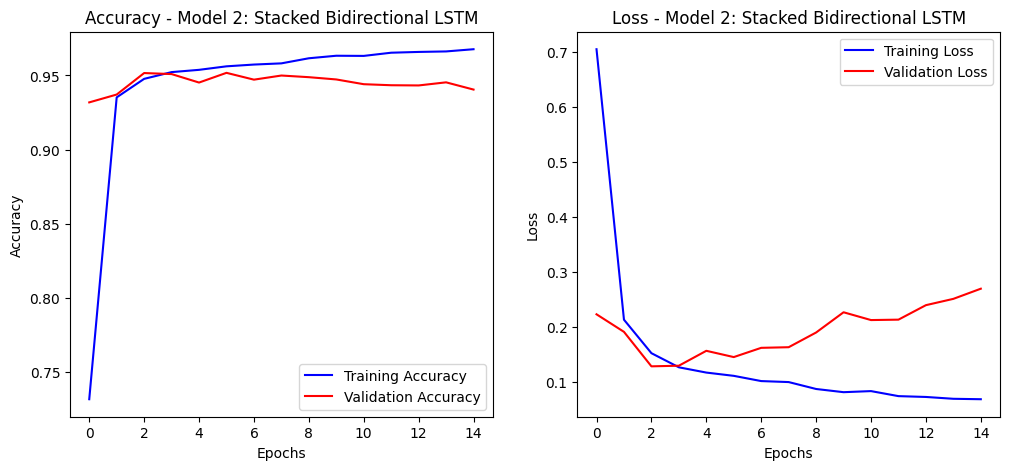

--- Hasil Evaluasi pada Data Uji ---
Model 1 - LSTM Sederhana: Loss = 1.7923, Accuracy = 0.1666
Model 2 - Stacked Bidirectional LSTM: Loss = 0.2692, Accuracy = 0.9416
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step

--- Classification Report untuk Model 1: LSTM Sederhana ---
              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00      2994
         joy       0.00      0.00      0.00      2994
        love       0.00      0.00      0.00      2995
       anger       0.00      0.00      0.00      2995
        fear       0.00      0.00      0.00      2995
    surprise       0.17      1.00      0.29      2994

    accuracy                           0.17     17967
   macro avg       0.03      0.17      0.05     17967
weighted avg       0.03      0.17      0.05     17967



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


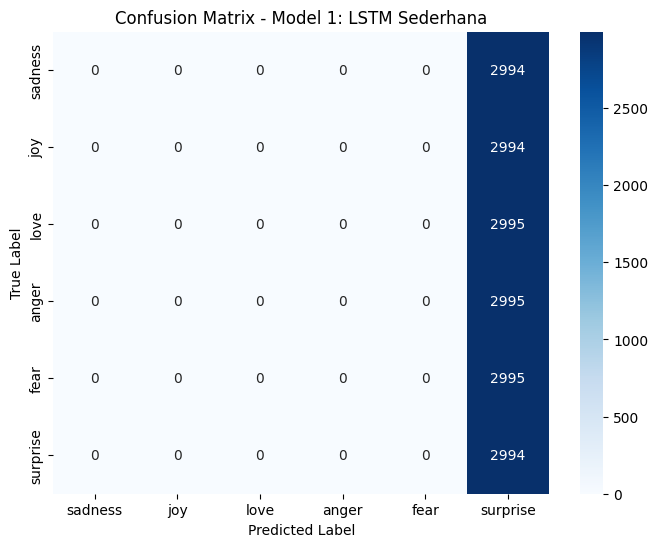

562/562 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step

--- Classification Report untuk Model 2: Stacked Bidirectional LSTM ---
              precision    recall  f1-score   support

     sadness       0.95      0.96      0.96      2994
         joy       0.96      0.91      0.93      2994
        love       0.93      0.96      0.95      2995
       anger       0.96      0.93      0.95      2995
        fear       0.94      0.89      0.91      2995
    surprise       0.91      1.00      0.95      2994

    accuracy                           0.94     17967
   macro avg       0.94      0.94      0.94     17967
weighted avg       0.94      0.94      0.94     17967



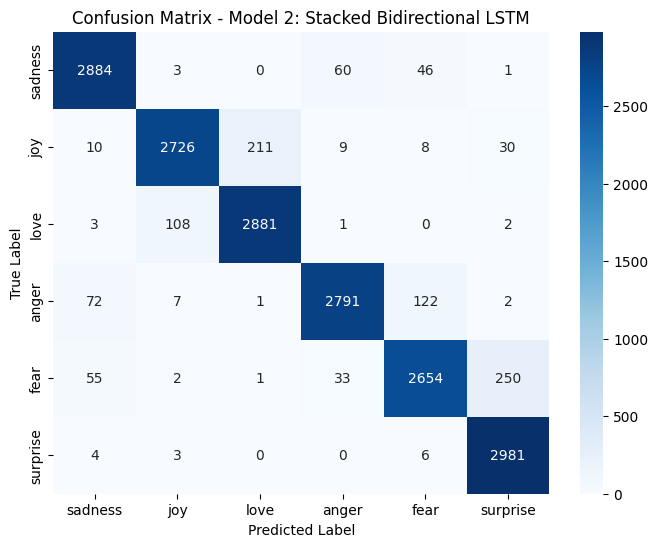

In [ ]:
# Fungsi untuk memvisualisasikan histori pelatihan
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title(f'Accuracy - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(f'Loss - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Visualisasi hasil Model 1 dan Model 2
plot_history(history_1, "Model 1: LSTM Sederhana")
plot_history(history_2, "Model 2: Stacked Bidirectional LSTM")

# Evaluasi pada data uji
print("--- Hasil Evaluasi pada Data Uji ---")
loss_1, acc_1 = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Model 1 - LSTM Sederhana: Loss = {loss_1:.4f}, Accuracy = {acc_1:.4f}")

loss_2, acc_2 = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Model 2 - Stacked Bidirectional LSTM: Loss = {loss_2:.4f}, Accuracy = {acc_2:.4f}")

# Analisis lebih dalam dengan Classification Report dan Confusion Matrix
def analyze_model_performance(model, model_name):
    # Prediksi pada data uji
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Classification Report
    print(f"\n--- Classification Report untuk {model_name} ---")
    class_names = [emotion_map[i] for i in sorted(emotion_map.keys())]
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

analyze_model_performance(model_1, "Model 1: LSTM Sederhana")
analyze_model_performance(model_2, "Model 2: Stacked Bidirectional LSTM")

In [ ]:
# Pilih model terbaik (biasanya model dengan akurasi validasi tertinggi)
best_model = model_2 if acc_2 > acc_1 else model_1
model_name = "Model 2" if acc_2 > acc_1 else "Model 1"
print(f"Model terbaik yang dipilih: {model_name}")

# Fungsi untuk prediksi kalimat baru
def predict_emotion(text):
    # Pra-pemrosesan teks input
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    # Prediksi
    prediction = best_model.predict(padded)
    predicted_label_index = np.argmax(prediction)
    predicted_emotion = emotion_map[predicted_label_index]
    confidence = prediction[0][predicted_label_index]

    print(f"Teks: '{text}'")
    print(f"Prediksi Emosi: {predicted_emotion} (Confidence: {confidence:.2f})")
    print("-" * 20)

# Uji coba dengan beberapa kalimat
predict_emotion("i feel so happy and excited for the weekend")
predict_emotion("i am feeling very scared after watching that horror movie")
predict_emotion("i love my new puppy so much, it's the best thing ever")
predict_emotion("this is making me so angry i cant stand it anymore")

Model terbaik yang dipilih: Model 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Teks: 'i feel so happy and excited for the weekend'
Prediksi Emosi: joy (Confidence: 1.00)
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Teks: 'i am feeling very scared after watching that horror movie'
Prediksi Emosi: fear (Confidence: 1.00)
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Teks: 'i love my new puppy so much, it's the best thing ever'
Prediksi Emosi: anger (Confidence: 0.62)
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Teks: 'this is making me so angry i cant stand it anymore'
Prediksi Emosi: anger (Confidence: 1.00)
--------------------
